In [2]:
# 1. Convert RGB color image to gray. 
import cv2 
import numpy as np
import matplotlib.pyplot as plt

def cvtGray(InputImage):                 # 3채널 이미지  cv2 -> BGR
    grayScaleImage = img[:,:,0]*0.2 + img[:,:,1]*0.5 + img[:,:,2]*0.3
    grayScaleImage = np.around(grayScaleImage)
    return grayScaleImage.astype('uint8')

img = cv2.imread('Image/pepper.bmp')

binaryImage = cvtGray(img)
cv2.imshow('grayScale', binaryImage)
cv2.waitKey(0)
cv2.destroyAllWindows()

print("Color image shape: ", img.shape)                  # 3채널
print("Binary image shape: ", binaryImage.shape)         # 1채널

Color image shape:  (512, 512, 3)
Binary image shape:  (512, 512)


In [3]:
# 2. Change the input image intensity. 

def changeIntensity(inputImage, offset):
    outputImage = inputImage[:,:].astype(int) + offset
    outputImage[ outputImage < 0] = 0
    outputImage[ outputImage > 255] = 255
    return outputImage.astype('uint8')

changedImage = changeIntensity(binaryImage, 100)
cv2.imshow('Intensity', changedImage)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
# 3.1 Generate the video by cropping 128x128 block from 512x512 image using the following order

def snail(InputImg):
    n=4                 # 512 / 128 
    row = 0             # row index
    col = -128          # col index
    direction = 128     # 변하는 값
    video = list()      # frame list
    while n > 0:            
        for i in range(n):   # 열 이동 
            col += direction
            cropImg = img[row:row+128, col:col+128,:]
            video.append(cropImg)
            
        n -= 1 
        for j in range(n):   # 행 이동
            row += direction
            cropImg = img[row:row+128, col:col+128,:]
            video.append(cropImg)
            
        direction *= -1          #방향 변경
    return video


video = snail(img)
print("frame shape: ", video[0].shape)  # 128 , 128
print("number of frames:", len(video))  # 16
cnt = len(video)
idx = 0

while True:
    cv2.imshow('image', video[idx])
    if cv2.waitKey(500) >= 0:  
        cv2.destroyAllWindows()
        break

    idx = (idx+1) % cnt

frame shape:  (128, 128, 3)
number of frames: 16


In [5]:
cv2.imshow('video[0]',video[0])
cv2.moveWindow('video[0]', 200,100)
cv2.imshow('video[1]',video[1])
cv2.moveWindow('video[1]', 400,100)
cv2.imshow('video[2]',video[2])
cv2.moveWindow('video[2]', 600,100)
cv2.imshow('video[3]',video[3])
cv2.moveWindow('video[3]', 800,100)
cv2.imshow('video[4]',video[4])
cv2.moveWindow('video[4]', 800,300)
cv2.imshow('video[5]',video[5])
cv2.moveWindow('video[5]', 800,500)
cv2.imshow('video[6]',video[6])
cv2.moveWindow('video[6]', 800,700)
cv2.imshow('video[7]',video[7])
cv2.moveWindow('video[7]', 600,700)
cv2.imshow('video[8]',video[8])
cv2.moveWindow('video[8]', 400,700)
cv2.imshow('video[9]',video[9])
cv2.moveWindow('video[9]', 200,700)
cv2.imshow('video[10]',video[10])
cv2.moveWindow('video[10]',200,500)
cv2.imshow('video[11]',video[11])
cv2.moveWindow('video[11]',200,300)
cv2.imshow('video[12]',video[12])
cv2.moveWindow('video[12]',400,300)
cv2.imshow('video[13]',video[13])
cv2.moveWindow('video[13]',600,300)
cv2.imshow('video[14]',video[14])
cv2.moveWindow('video[14]',600,500)
cv2.imshow('video[15]',video[15])
cv2.moveWindow('video[15]',400,500)
cv2.waitKey(0)
cv2.destroyAllWindows()

False
check number of pixel:  True


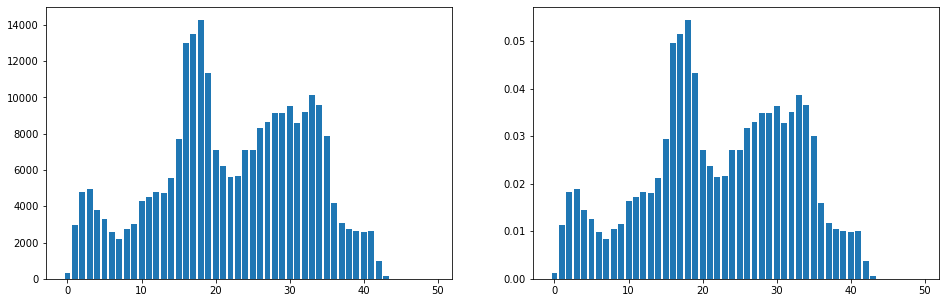

In [15]:
# 4. Find the histogram for given input gray image. 

grey = cvtGray(img)

def toHist(inputImage, bins):
    h, w = inputImage.shape[:2]        # image height width
    hist = np.zeros(bins)              # histogram vector
    width= 256 / bins                  # width
    inputImage2 = inputImage // width   # indexing
    print(np.array_equal(inputImage2,inputImage ))
    for i in range(h):
        for j in range(w):
            index = round(inputImage2[i][j])
            hist[index] +=1 
            
    return hist

hist = toHist(grey, 50)
print("check number of pixel: ", sum(hist) == 512 * 512)   # histogram 값들의 합 === 전체 픽셀 수

# Normalized histogram
hist_hat = hist / (512 * 512)

x = np.arange(len(hist))
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.bar(x,hist)
plt.subplot(1,2,2)
plt.bar(x,hist_hat)
plt.show()

In [14]:
# 5. Binarize the input image using Otsu method 

# calculate weight 
binarizedImage = grey.copy() 

weight = np.zeros(256)
weight[0] = hist_hat[0] # 초깃값

for i in range(1,len(hist_hat)):
    weight[i] = weight[i-1] + hist_hat[i]

totalMean = np.sum(binarizedImage) / (512 * 512)
print("totalMean: ", totalMean )

# calculate mean_0
mean_0 = np.zeros(256)
for i in range(1,256):
    if(weight[i]):
        mean_0[i] = (weight[i-1]*mean_0[i-1] + i * hist_hat[i]) / weight[i]
    else:
        mean_0[i] = (weight[i-1]*mean_0[i-1] + i * hist_hat[i]) / 0.00000000001

# calculate mean_1
mean_1 = np.zeros(256) 
for i in range(256):
    if(1-weight[i]):
        mean_1[i] = ( totalMean - weight[i]*mean_0[i] ) / (1 - weight[i])
    else:
        mean_1[i] = ( totalMean - weight[i]*mean_0[i] ) / 0.00000000001

# calculate v_between
v_between = np.zeros(256)
for i in range(256):
    v_between[i] = weight[i]*(1-weight[i])*(mean_0[i] - mean_1[i])**2

# find threshold
threshold = np.argmax(v_between)
print("threshold:", threshold)

# binarization
binarizedImage[binarizedImage >= threshold] = 255
binarizedImage[binarizedImage < threshold] = 0
cv2.imshow('binary', binarizedImage)
cv2.waitKey(0)
cv2.destroyAllWindows()

totalMean:  116.03787994384766


IndexError: index 100 is out of bounds for axis 0 with size 100

In [9]:
th, dst = cv2.threshold(grey, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print("openCV, otsu's threshold:", th)  

openCV, otsu's threshold: 117.0
